In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from scipy.stats import kurtosis,skew
import seaborn as sns

In [ ]:
df=pd.read_csv('ai_dev_productivity.csv')

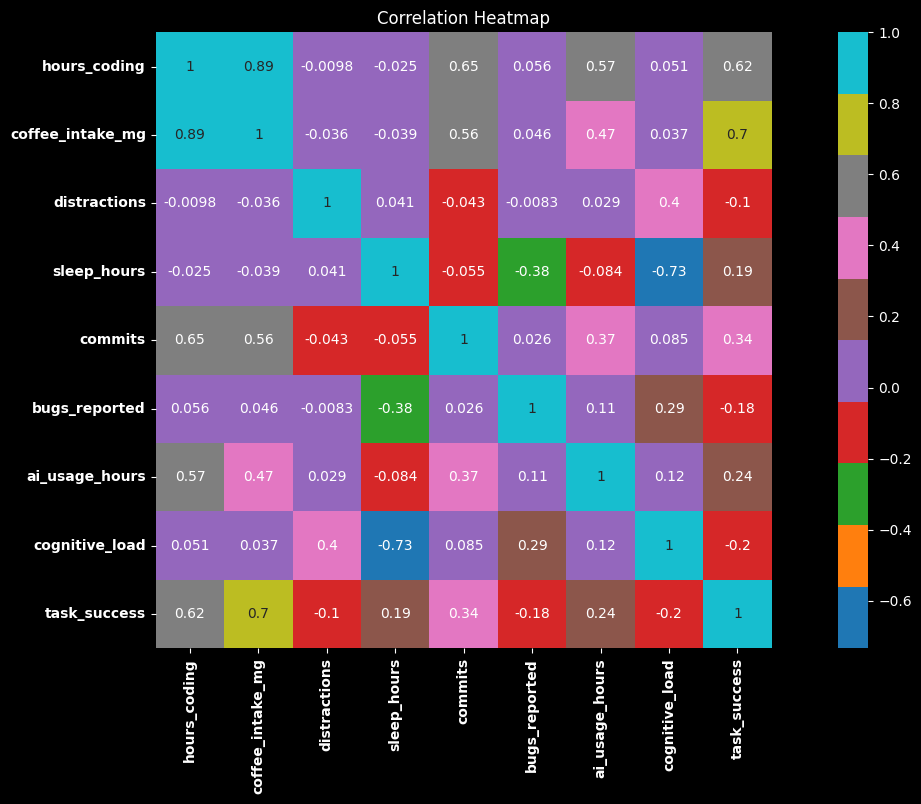

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

plt.style.use('dark_background')

plt.figure(figsize=(17,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, square=True, cmap='tab10')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.title('Correlation Heatmap')
plt.show()

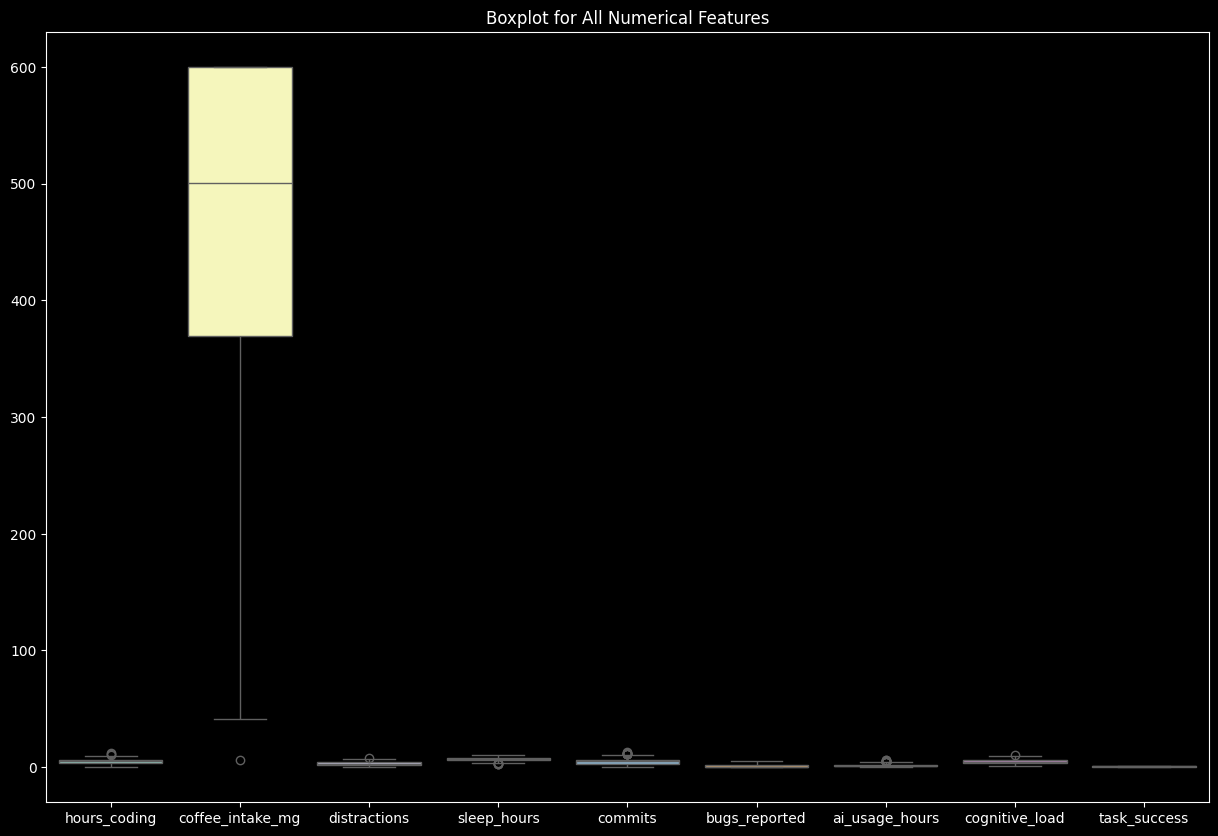

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for All Numerical Features')
plt.show()

<Figure size 1500x1000 with 0 Axes>

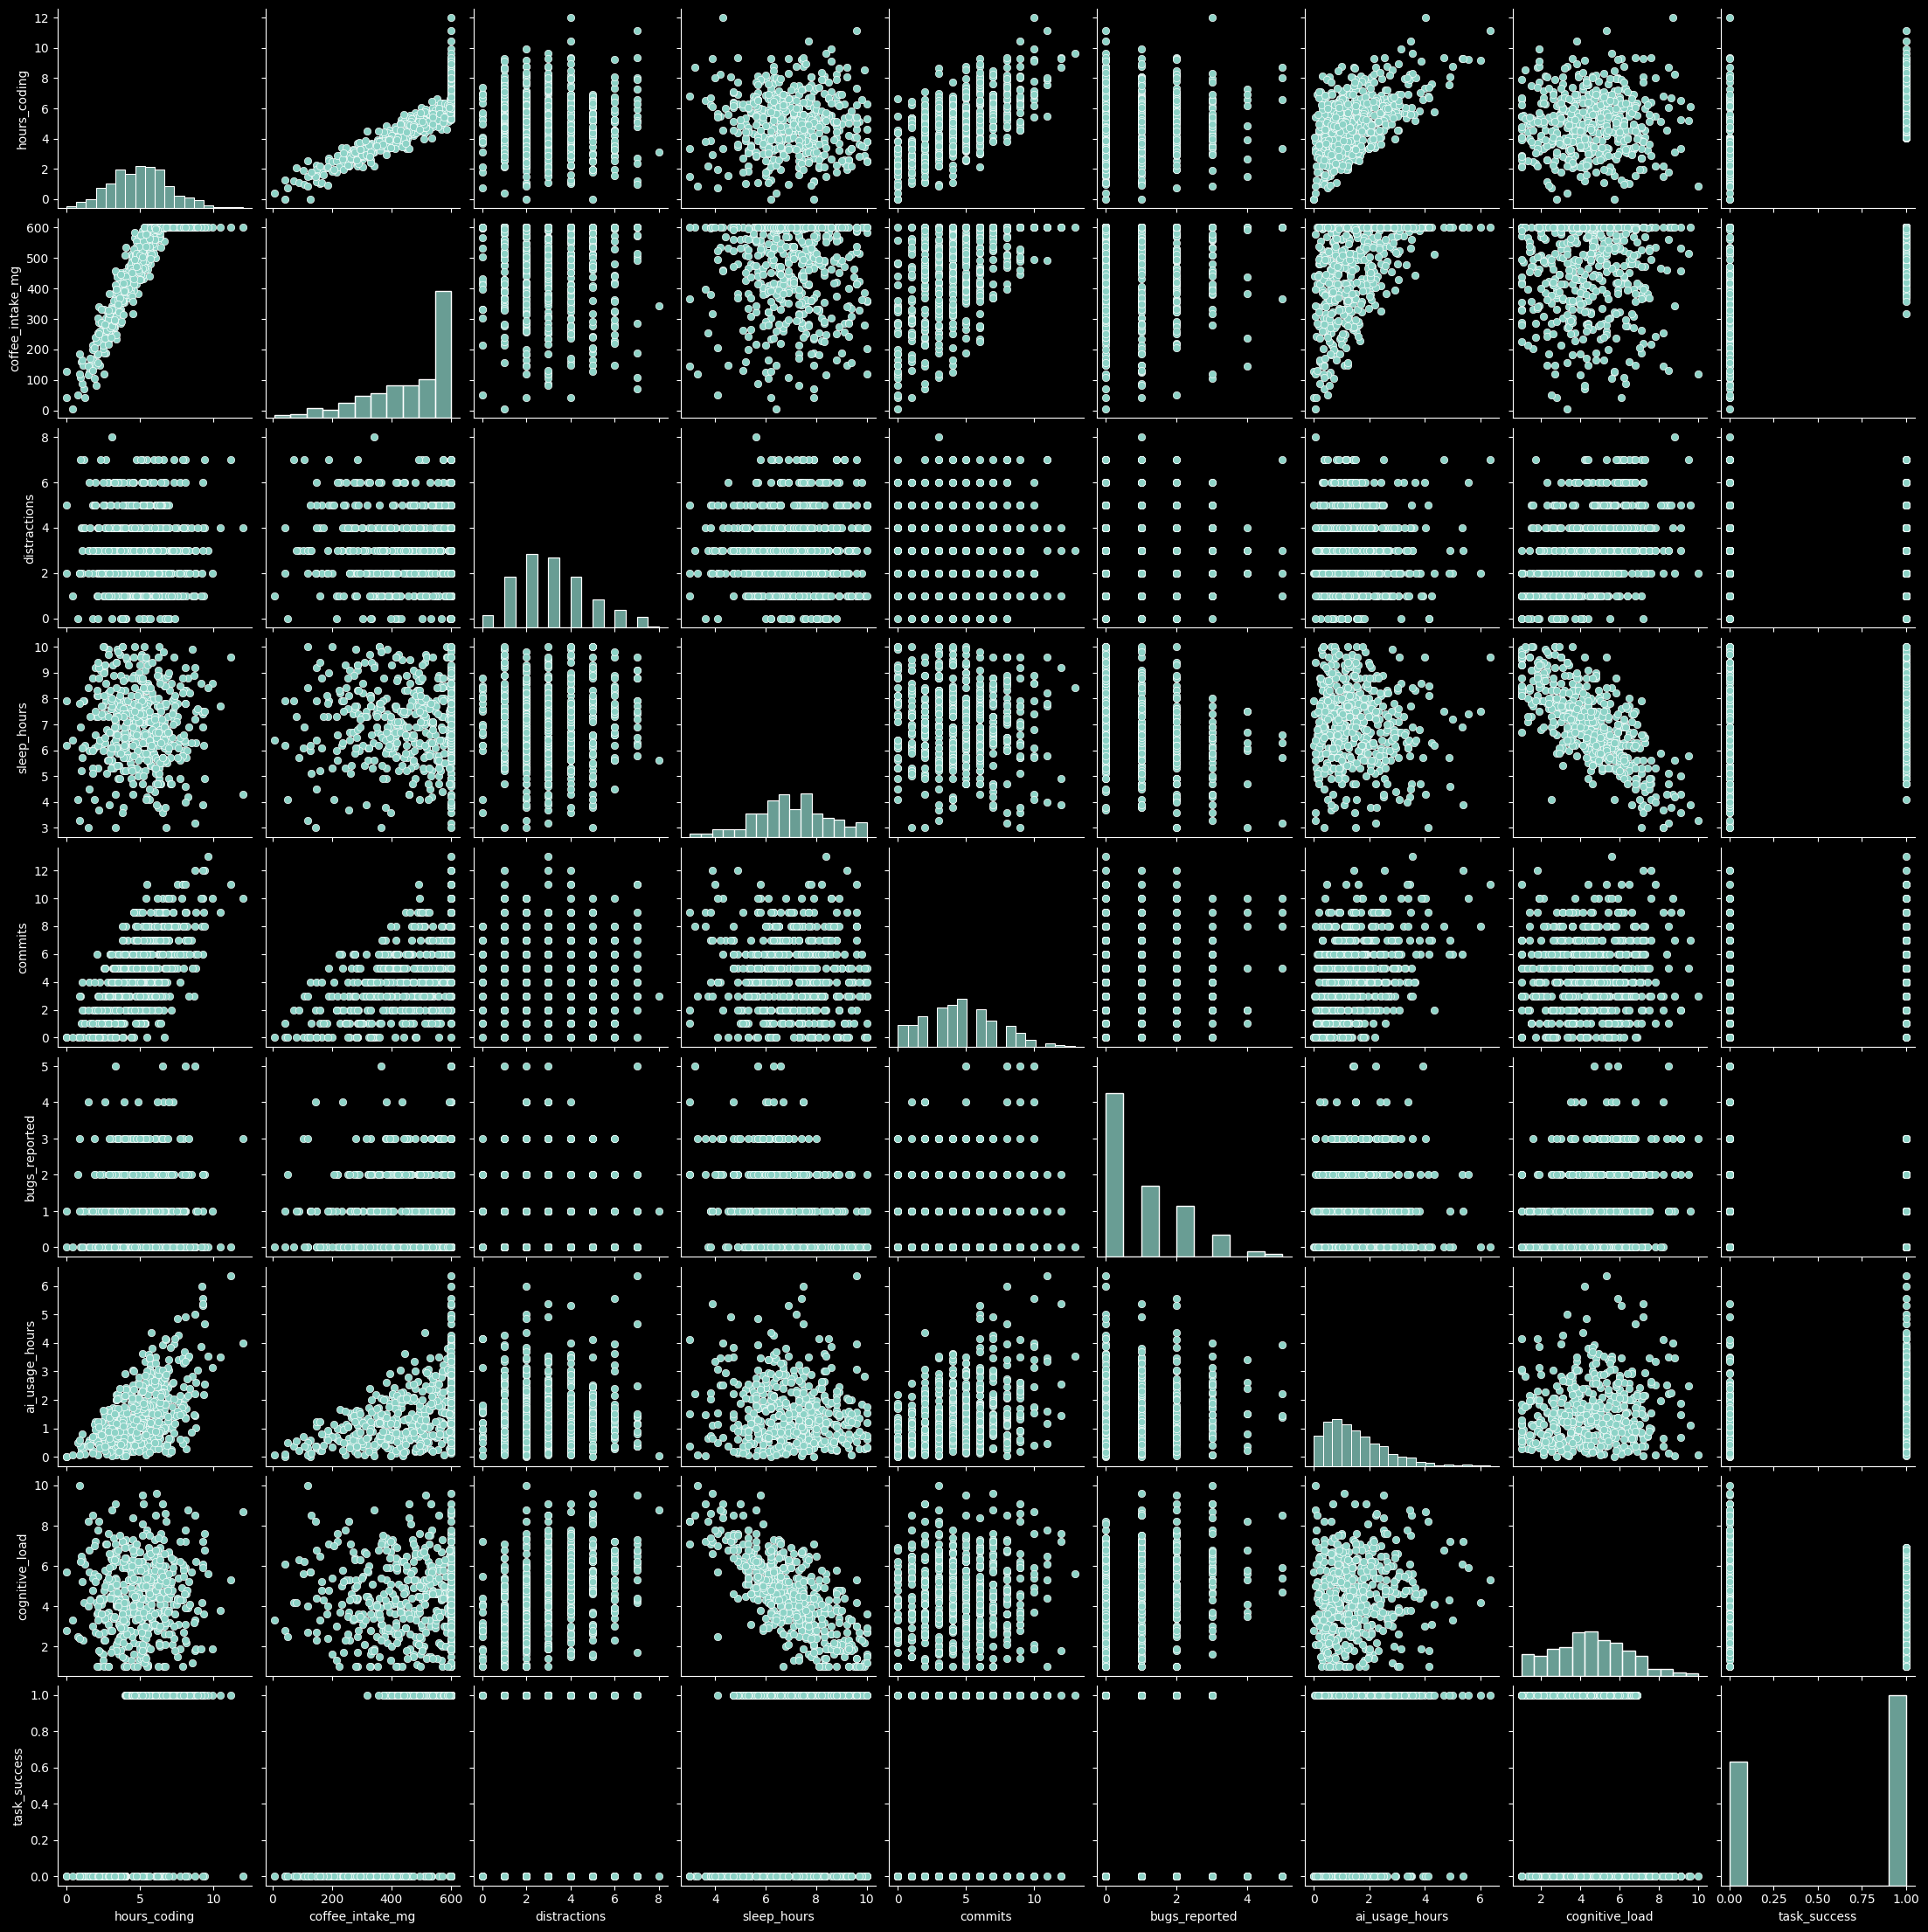

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
sns.pairplot(df)

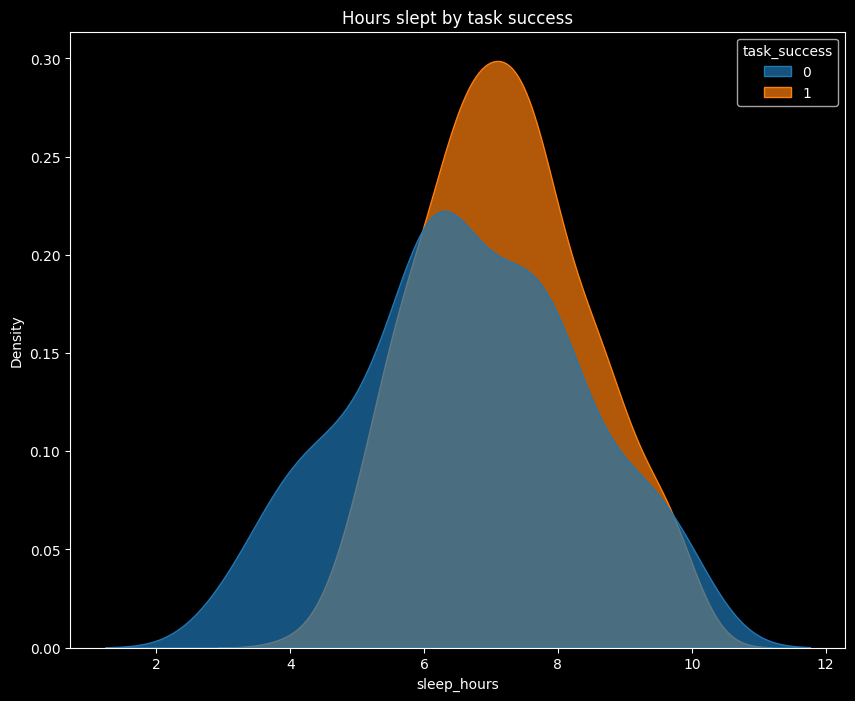

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df, x='sleep_hours', hue='task_success', fill=True, common_norm=False, alpha=0.7, palette='tab10')
plt.title('Hours slept by task success')
plt.show()

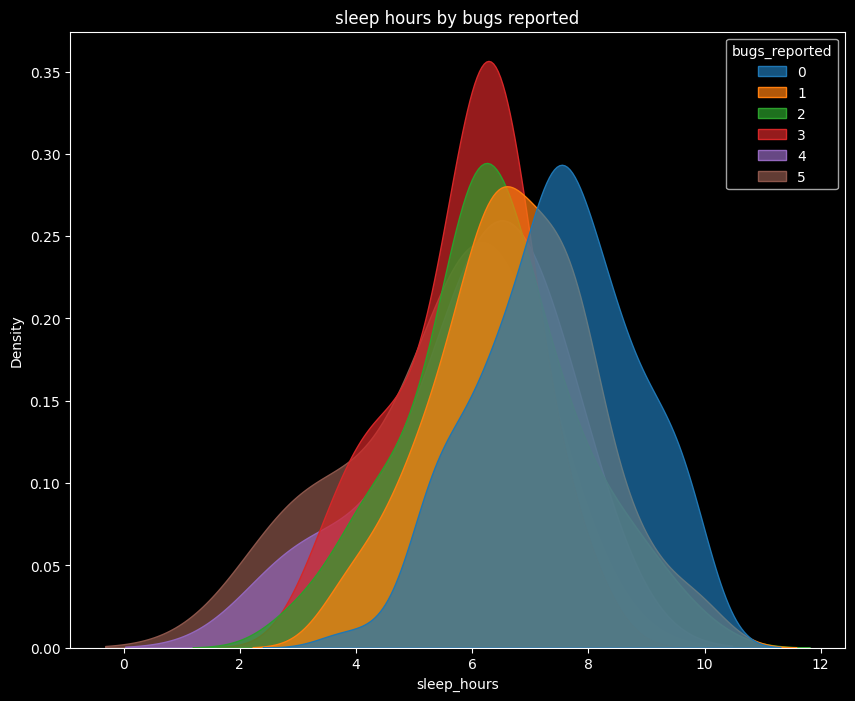

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df, x='sleep_hours', hue='bugs_reported', fill=True, common_norm=False, alpha=0.7, palette='tab10')
plt.title('sleep hours by bugs reported')
plt.show()

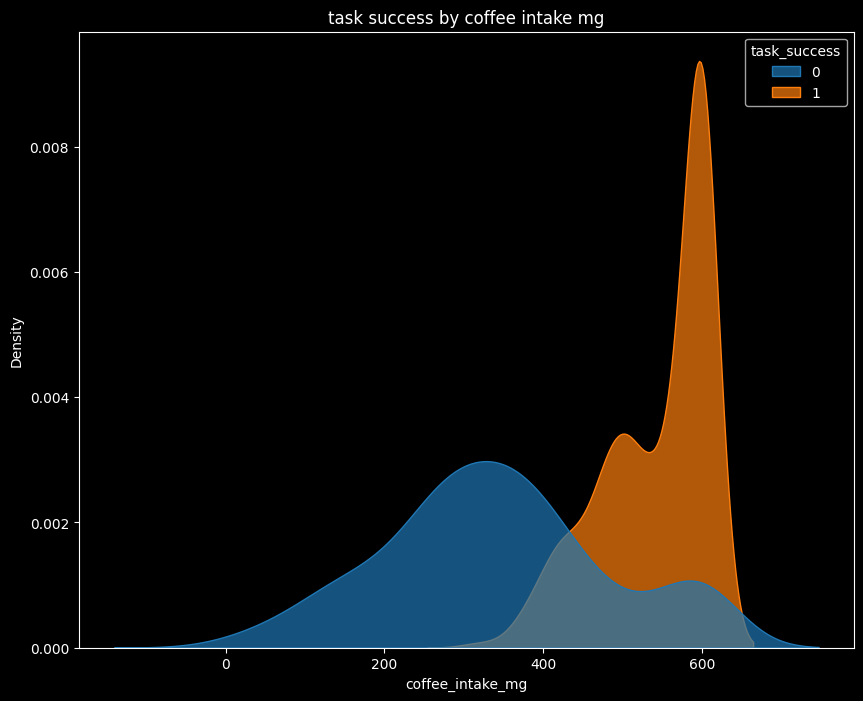

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df, hue='task_success', x='coffee_intake_mg', fill=True, common_norm=False, alpha=0.7, palette='tab10')
plt.title('task success by coffee intake mg')
plt.show()

Estimating college admission or not


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from scipy.stats import kurtosis,skew
import seaborn as sns

In [ ]:
df = pd.read_csv('Data-Table-1.csv')

In [ ]:
name = input("What's your name? ")
test_type = input("Would you like to submit your ACT or SAT score? ")
college = input("Which college would you like to apply to? ")

college_row = df[df['Name'].str.lower().str.contains(college.lower(), na=False)]

if college_row.empty:
    print("College not found in database.")
else:
    if test_type.upper() == "ACT":
        act_score = int(input("What's your ACT score? "))
        act_25 = college_row["ACT Composite 25th percentile score"].values[0]
        act_75 = college_row["ACT Composite 75th percentile score"].values[0]

        if pd.notnull(act_25) and pd.notnull(act_75):
            if act_score <= act_25:
                prob = round(20 + 30 * (act_score / act_25), 1)  # Min 20%, scaling up
            elif act_score >= act_75:
                prob = round(90 + 10 * (min(act_score - act_75, 5) / 5), 1)  # Cap around 100%
            else:
                prob = round(50 + 40 * (act_score - act_25) / (act_75 - act_25), 1)
            print(f"{name}, your estimated chance of acceptance to {college} is {prob}%.")
        else:
            print("ACT score data not available for this college.")

    elif test_type.upper() == "SAT":
        sat_score = int(input("What's your total SAT score? "))
        sat_25 = (college_row["SAT Critical Reading 25th percentile score"].values[0] +
                  college_row["SAT Math 25th percentile score"].values[0])
        sat_75 = (college_row["SAT Critical Reading 75th percentile score"].values[0] +
                  college_row["SAT Math 75th percentile score"].values[0])

        if pd.notnull(sat_25) and pd.notnull(sat_75):
            if sat_score <= sat_25:
                prob = round(20 + 30 * (sat_score / sat_25), 1)
            elif sat_score >= sat_75:
                prob = round(90 + 10 * (min(sat_score - sat_75, 100) / 100), 1)
            else:
                prob = round(50 + 40 * (sat_score - sat_25) / (sat_75 - sat_25), 1)
            print(f"{name}, your estimated chance of acceptance to {college} is {prob}%.")
        else:
            print("SAT score data not available for this college.")

    else:
        print("Invalid test type. Please enter 'ACT' or 'SAT'.")

What's your name? Ryan 
Would you like to submit your ACT or SAT score? SAT
Which college would you like to apply to? Harvard University
What's your total SAT score? 1560
Ryan , your estimated chance of acceptance to Harvard University is 81.6%.
